In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import Ridge, LinearRegression, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import  math

from azureml import Workspace

ws = Workspace()
ds = ws.datasets['county_facts_dictionary.csv']
frame = ds.to_dataframe()

trainDF = ws.datasets['ames_train.csv'].to_dataframe();
testDF = ws.datasets['ames_test.csv'].to_dataframe();
sampleSubmissionDF = ws.datasets['ames_sample_submission.csv'].to_dataframe();

all_data = pd.concat((trainDF.loc[:,'MSSubClass':'SaleCondition'],
                      testDF.loc[:,'MSSubClass':'SaleCondition']))


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
all_data.loc[all_data.PoolQC.isnull(), 'PoolQC']='NA'


# In[212]:

all_data = all_data.replace({'PoolQC': {'Ex': 4,
                                            'Gd': 3,
                                            'TA': 2,
                                            'Fa': 1,
                                           'NA':0
                                            }
        })


# ### Alley

# In[213]:

all_data.loc[all_data.Alley.isnull(), 'Alley']='NA'


# ### Fence

# In[214]:

all_data.loc[all_data.Fence.isnull(), 'Fence']='NA'


# In[215]:

all_data = all_data.replace({'Fence': {'GdPrv': 4,
                                            'MnPrv': 3,
                                            'GdWo': 2,
                                            'MnWw': 1,
                                           'NA':0
                                            }
        })


# ### FirePlaceQu

# In[216]:

all_data.loc[all_data.FireplaceQu.isnull(), 'FireplaceQu']='NA'


# In[217]:

all_data = all_data.replace({'FireplaceQu': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })


# ### Utilities

# In[218]:

all_data.loc[all_data.Utilities.isnull(), 'Utilities']='AllPub'


# ### Kitchen Qualitty

# In[221]:

all_data.loc[all_data.KitchenQual.isnull(), 'KitchenQual']='TA'


# In[222]:

all_data = all_data.replace({ 'KitchenQual': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1
                                            }
        })


# ### SaleType

# In[223]:

all_data.loc[all_data.SaleType.isnull(), 'SaleType']='WD'


# ### MasVnrArea

# In[224]:

all_data.loc[all_data.MasVnrArea.isnull(), 'MasVnrArea']=0


# ### MasVnrType

# In[225]:

all_data.loc[all_data.MasVnrType.isnull(), 'MasVnrType']='None'


# ### Basement

# In[226]:

for c in ['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath']:
    all_data.loc[all_data[c].isnull(), c]=0


# In[227]:

indexes = all_data['BsmtFinType1'].isnull()
for c in ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure']:
    all_data.loc[indexes, c]='NA'


# In[228]:

indexes = all_data['BsmtFinType1'].isnull()
for c in ['BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtExposure']:
    all_data.loc[indexes, c]='NA'
#We filtered on BsmtFinType1 because it had least no of Nulls. Now there would 2 more Nulls in BsmtCond, need to check it further

all_data.loc[all_data.BsmtCond.isnull(), 'BsmtCond']='TA'
all_data = all_data.replace({ 'BsmtCond': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })


# In[231]:


all_data.loc[all_data.BsmtQual.isnull(), 'BsmtQual']='TA'
all_data = all_data.replace({ 'BsmtQual': {'Ex': 5,
                                            'Gd': 4,
                                            'TA': 3,
                                            'Fa': 2,
                                            'Po': 1,
                                           'NA':0
                                            }
        })



# In[234]:

all_data.loc[all_data.BsmtExposure.isnull(), 'BsmtExposure']='No'
all_data = all_data.replace({ 'BsmtExposure': {'Gd': 4,
                                            'Av': 3,
                                            'Mn': 2,
                                            'No': 1,
                                              'NA':0
                                            }
        })


# In[235]:

all_data.loc[all_data.BsmtFinType2.isnull(), 'BsmtFinType2']='Unf'
all_data = all_data.replace({ 'BsmtFinType2': {'GLQ': 6,
                                            'ALQ': 5,
                                            'BLQ': 4,
                                            'Rec': 3,
                                            'LwQ': 2,
                                              'Unf':1,
                                              'NA':0
                                            }
        })


# ### MSZoning

# In[237]:

all_data.loc[all_data.MSZoning.isnull(), 'MSZoning']='RL'


# ### Functional

# In[238]:

all_data.loc[all_data.Functional.isnull(), 'Functional']='Typ'
all_data = all_data.replace({ 'Functional': {'Typ': 7,
                                            'Min1': 6,
                                            'Min2': 5,
                                            'Mod': 4,
                                            'Maj1': 3,
                                              'Maj2':2,
                                              'Sev':1,
                                             'Sal':0
                                            }
        })


# In[239]:

all_data.loc[all_data.Electrical.isnull(), 'Electrical']='SBrkr'


# ### LotFrontage

# In[240]:

nullIndex = all_data.LotFrontage.isnull()


# In[241]:

nonNullIndex = all_data.LotFrontage.notnull()


# In[242]:

X_Train = np.sqrt(all_data.LotArea[nonNullIndex])


# In[243]:

Y_Train = all_data.LotFrontage[nonNullIndex]


# In[244]:

y= np.array(Y_Train)


# In[245]:

b=np.array(X_Train)
x = b.reshape(len(b),1)


# In[246]:

model = LinearRegression()


# In[247]:

model.fit(x, y)


# In[248]:

X_Test = np.sqrt(all_data.LotArea[nullIndex])
b=np.array(X_Test)
xt = b.reshape(len(b),1)
yPred = model.predict(xt)


# In[249]:

all_data.loc[nullIndex, 'LotFrontage']=yPred


# In[250]:

all_data.LotFrontage.isnull().sum()


# ### Garage

# In[251]:

garage = all_data[['GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea']]


# In[252]:

garage.head()


# In[253]:

garage.GarageYrBlt.isnull().sum()


# In[254]:

garage[garage.GarageYrBlt.isnull()].head()


# So when garage year blt is null, we can say that there is no garage.
# Looking at the data description it seems that GarageType, GarageFinish, GarageQuality, GarageCondition has NA values signifying No Garrage. Replacing them.

# In[255]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageCond']='NA'


# In[256]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageFinish']='NA'


# In[257]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageQual']='NA'


# In[258]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageType']='NA'


# Now how to impute garage year built, when garage is not built. I think we should check the relation between Garage year build and sale price

# In[259]:

# In[260]:

trainDF['HasGarage']=trainDF.GarageYrBlt.apply(lambda x:0 if math.isnan(x) else 1)



# In[262]:

all_data.loc[all_data.GarageYrBlt.isnull(), 'GarageYrBlt']=0
all_data['HasGarage']=all_data.GarageYrBlt.apply(lambda x:0 if math.isnan(x) else 1)


# We clearly see that house that garage has more price. Now how to impute this value.

# In[263]:

garage = all_data[['GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType', 'GarageCars', 'GarageArea']]


# In[264]:

garage[garage.GarageCars.isnull()]


# We will make them zero. We did not do it earlier because there were some cases when garageYrBlt was Null but Garage Cars where not null. Probably they refered to detached garage type. Lets have a look

# In[265]:

ind = garage.GarageYrBlt==0


# In[266]:

(garage.GarageCars[ind]!=0).sum()


# In[267]:

(garage.GarageArea[ind]!=0).sum()


# Okay so these are just two cases, we will make them all zero.

# In[268]:

all_data.loc[all_data.GarageCars.isnull(), ('GarageCars', 'GarageArea')]=0

all_data = pd.get_dummies(all_data)

In [4]:
# Data Frames
X_train = all_data[:trainDF.shape[0]] #We are using raw selector operator
X_test = all_data[trainDF.shape[0]:]
yOriginal = trainDF.SalePrice
y = np.log(yOriginal)

In [5]:
# Numpy Arrays without intercept
np0_X_train = X_train.as_matrix()
np0_X_test = X_test.as_matrix()

# Numpy Arrays with intercept
i = [1 for j in range(X_train.shape[0])]
i = np.array(i)
i = np.expand_dims(i, axis=1)
np_X_train = np.hstack((i, X_train.as_matrix()))

i = [1 for j in range(X_test.shape[0])]
i = np.array(i)
i = np.expand_dims(i, axis=1)
np_X_test = np.hstack((i, X_test.as_matrix()))


np_y = np.log(yOriginal).as_matrix()

In [6]:
#Normalized

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(all_data)
all_data_normalized = scaler.transform(all_data)
all_data_normalized = pd.DataFrame(data=all_data_normalized, index=all_data.index, columns=all_data.columns)

X_train_normalized = all_data_normalized[:trainDF.shape[0]] #We are using raw selector operator
X_test_normalized = all_data_normalized[trainDF.shape[0]:]
yOriginal = trainDF.SalePrice
y_normalized = np.log(yOriginal)

# Numpy Arrays without intercept
np0_X_train_normalized = X_train_normalized.as_matrix()
np0_X_test_normalized = X_test_normalized.as_matrix()

# Numpy Arrays with intercept
i = [1 for j in range(X_train_normalized.shape[0])]
i = np.array(i)
i = np.expand_dims(i, axis=1)
np_X_train_normalized = np.hstack((i, X_train_normalized.as_matrix()))

i = [1 for j in range(X_test_normalized.shape[0])]
i = np.array(i)
i = np.expand_dims(i, axis=1)
np_X_test_normalized = np.hstack((i, X_test_normalized.as_matrix()))


np_y_normalized = np.log(yOriginal).as_matrix()

In [7]:
def direct_rmse_error(actual, predicted):
    ans = np.sqrt(np.sum(np.square(actual-predicted))/len(actual))
    return ans

def my_cv(model, x, y, n_splits):
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X_train)
    ary = []
    for train_index, test_index in kf.split(x):    
        if type(x) is pd.core.frame.DataFrame:
            Xtr, Xte = x.ix[train_index, :], x.ix[test_index, :]
            Ytr, Yte = y[train_index], y[test_index]
        else:
            Xtr, Xte = x[train_index], x[test_index]
            Ytr, Yte = y[train_index], y[test_index]
        model.fit(Xtr, Ytr)
        Y_pred = model.predict(Xte)
        ary.append(direct_rmse_error(Yte, Y_pred))        
    return np.mean(ary)

Baseline

In [8]:
class BaselineModel:
    def __init__(self):
        self.ans = None
        
    def fit(self, XX, YY):
        self.ans = YY.mean()
        
    def predict(self, XX):
        i = [self.ans for j in range(XX.shape[0])]
        YY = np.array(i)
        return YY

In [9]:
cv_score = my_cv(BaselineModel(), X_train, y, 5)    
print ("rmse using least square is = ", cv_score)

rmse using least square is =  0.399228279209


Simple Linear Regression (Ordinary Least Square)

Looking at documentation we see that it gives least norm solution. Least norm solution is one where length (norm) of parameter vector is minimun. This is different from regularization is a sense that we are not adding anything to error function. Here we have two seperate error function J1 and J2 which we want to optimize simultaneously.

In [10]:
cv_score = my_cv(LinearRegression(fit_intercept=True), X_train, y, 5)    
print ("rmse using least square is = ", cv_score)

rmse using least square is =  0.155965208656


Now solving with Pusedo Inverse

In [11]:
class PusedoInvModel:
    def __init__(self):
        self.parameter = []
        
    def fit(self, XX, YY):
        temp0 = XX.T.dot(XX)
        temp1 = np.linalg.pinv(temp0)
        self.parameter = temp1.dot(XX.T).dot(YY)
        
    def predict(self, XX):
        YY = XX.dot(self.parameter)
        return YY

In [12]:
cv_score = my_cv(PusedoInvModel(), np_X_train, np_y, 5)    
print ("rmse using least square is = ", cv_score)

rmse using least square is =  0.160966394443


## Ridge Regression, Matrix Solution

In [13]:
class RidgeMatrixModel:
    def __init__(self, alpha):
        self.parameter = []
        self.alpha = alpha
        
    def fit(self, XX, YY):
        I = np.identity(XX.shape[1])
        temp0 = XX.T.dot(XX) + (self.alpha)*I
        temp1 = np.linalg.inv(temp0)
        self.parameter = temp1.dot(XX.T).dot(YY)
        
    def predict(self, XX):
        YY = XX.dot(self.parameter)
        return YY

value of alpha is =  15.0
rmse using matrix solution is =  0.139522321198


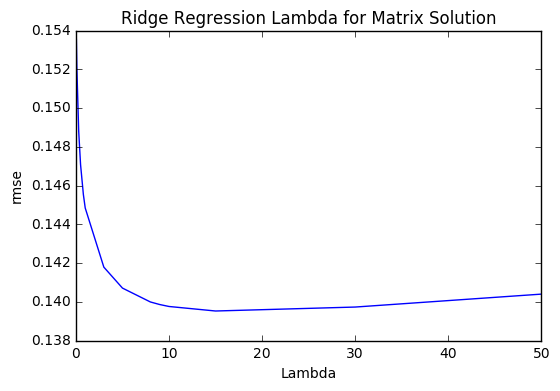

In [14]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.8, 1, 3, 5, 8, 9, 10, 15, 30, 50]
cv_ridge = []
cv_ridge = [my_cv(RidgeMatrixModel(alpha=alpha), np_X_train, np_y, 5) 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
alpha = cv_ridge.idxmin()
print ("value of alpha is = ",alpha)
print ("rmse using matrix solution is = ", cv_ridge[alpha])
cv_ridge.plot(title = "Ridge Regression Lambda for Matrix Solution")
plt.xlabel("Lambda")
plt.ylabel("rmse")

Ridge Regrression, In sklearn you can specify various optimzization algorithms

value of alpha is =  15.0
rmse using sklearn solution is =  0.139277941436


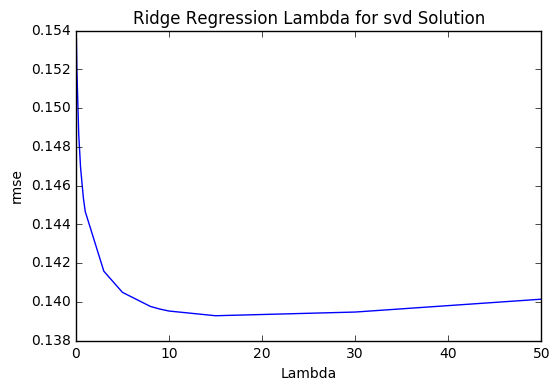

In [15]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.8, 1, 3, 5, 8, 9, 10, 15, 30, 50]
cv_ridge = []
cv_ridge = [my_cv(Ridge(alpha=alpha, fit_intercept=True), X_train, y, 5) 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
alpha = cv_ridge.idxmin()
print ("value of alpha is = ",alpha)
print ("rmse using sklearn solution is = ", cv_ridge[alpha])
cv_ridge.plot(title = "Ridge Regression Lambda for svd Solution")
plt.xlabel("Lambda")
plt.ylabel("rmse")

In [16]:
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
ans = []
alphaSeries = []
for s in solver:
    alphas = [0.05, 0.1, 0.3, 0.5, 0.8, 1, 3, 5, 8, 9, 10, 15, 30, 50, 75]
    cv_ridge = [my_cv(Ridge(alpha = alpha, fit_intercept=True, solver = s), X_train, y, 5) 
                for alpha in alphas]
    cv_ridge = pd.Series(cv_ridge, index = alphas)
    alpha = cv_ridge.idxmin()
    alphaSeries.append(alpha)
    ans.append(cv_ridge[alpha])
solver_data = pd.DataFrame({'alpha':alphaSeries, 'rmse':ans}, index=solver)    
solver_data

,alpha,rmse
auto,15.00,0.139278
svd,15.00,0.139278
cholesky,15.00,0.139278
lsqr,0.05,0.188073
sparse_cg,15.00,0.188073
sag,0.50,0.230818


value of alpha is =  0.8
rmse using sklearn solution is =  0.230826521496


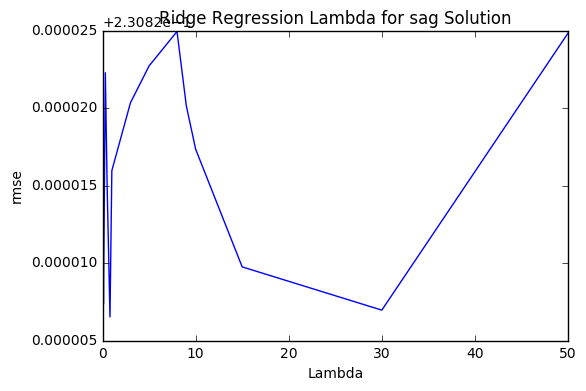

In [17]:
alphas = [0.05, 0.1, 0.3, 0.5, 0.8, 1, 3, 5, 8, 9, 10, 15, 30, 50]
cv_ridge = []
cv_ridge = [my_cv(Ridge(alpha=alpha, solver='sag'), X_train, y, 5) 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
alpha = cv_ridge.idxmin()
print ("value of alpha is = ",alpha)
print ("rmse using sklearn solution is = ", cv_ridge[alpha])
cv_ridge.plot(title = "Ridge Regression Lambda for sag Solution")
plt.xlabel("Lambda")
plt.ylabel("rmse")

## Lasso Regression, use coordinate descent optimization alogorithm

Lasso regression with X_train as it is and log(y)
value of alpha is =  1
rmse is =  0.196388163063
No of non zero coefficeints =  13


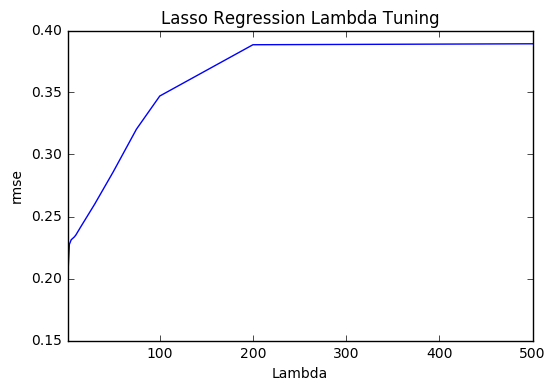

In [18]:
alphas = [1, 3, 5, 8, 9, 10, 15, 30, 50, 75, 100, 200, 500]
cv_lasso = [my_cv(Lasso(alpha = alpha, max_iter=10000), X_train, y, 5) 
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
alpha = cv_lasso.idxmin()
print ("Lasso regression with X_train as it is and log(y)")
print ("value of alpha is = ",alpha)
print ("rmse is = ", cv_lasso[alpha])
model = Lasso(alpha = alpha)
model.fit(X_train, y)
x = [a for a in model.coef_ if a!=0]
print ("No of non zero coefficeints = ", len(x))
cv_lasso.plot(title = "Lasso Regression Lambda Tuning")
plt.xlabel("Lambda")
plt.ylabel("rmse")

## Simple Linear Regression

(With Gradient Descent without normalizing data) 

nan


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: overflow encountered in square


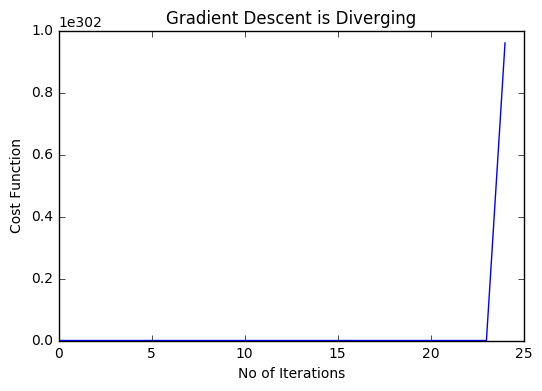

In [19]:
from sklearn.model_selection import train_test_split
# m denotes the number of examples here, not the number of features
# alpha is step size
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    Jcost = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        Jcost.append(cost)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta, np.asarray(Jcost)
Xtr, Xte, Ytr, Yte = train_test_split(np_X_train, np_y, test_size=0.33, random_state=42)
m, n = np.shape(Xtr)
alpha = 0.005
numIterations=100
theta = np.ones(n)
theta, Jcost = gradientDescent(Xtr, Ytr, theta, alpha, m, numIterations)
yPred = Xte.dot(theta)
print (direct_rmse_error(yPred, Yte))
plt.plot(Jcost)
plt.title("Gradient Descent is Diverging")
plt.xlabel("No of Iterations")
plt.ylabel("Cost Function")

Simple Linear Regression (With Gradient Descent after normalizing data, step size = 0.005, no of Iterations = 5000)

1.92598933048


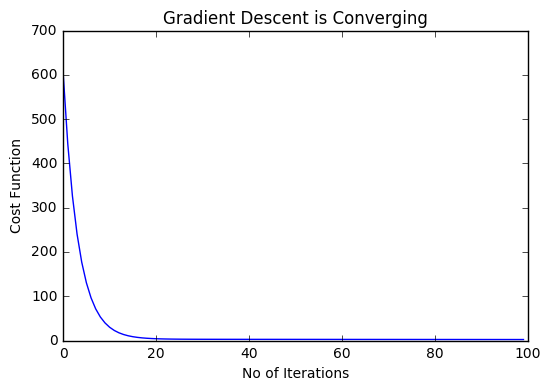

In [20]:
Xtr, Xte, Ytr, Yte = train_test_split(np_X_train_normalized, np_y_normalized, test_size=0.33, random_state=42)
m, n = np.shape(Xtr)
alpha = 0.005
numIterations=100
theta = np.ones(n)
theta, Jcost = gradientDescent(Xtr, Ytr, theta, alpha, m, numIterations)
yPred = Xte.dot(theta)
print (direct_rmse_error(yPred, Yte))
plt.plot(Jcost)
plt.title("Gradient Descent is Converging")
plt.xlabel("No of Iterations")
plt.ylabel("Cost Function")